## 1. Import required libraries

In [1]:
import pandas as pd
import ExtraCellTalk

## 2. Import data

In [2]:
# Load uterine luminal free protein
ULF_prot_abun = pd.read_excel("./data/ULF_protein.xlsx", index_col=0)
ULF_samp_info = pd.read_excel("./data/ULF_sample.xlsx", index_col=0)
ULF_prot_abun = ULF_prot_abun.groupby('Gene Name').agg(sum)[['D9_1','D9_2','D9_3','D12_1','D12_2','D12_3']]

# Load TE data and use engine="pyarrow" to speed up the process of reading large files
TE_expr = pd.read_csv('./data/TE_expr.csv', index_col=0, engine="pyarrow")
TE_info = pd.read_csv('./data/TE_celltype.csv', index_col=0, engine="pyarrow")

# Load Endometrum data
Endo_expr = pd.read_csv('./data/Endo_expr.csv', index_col=0, engine="pyarrow")
Endo_info = pd.read_csv('./data/Endo_celltype.csv', index_col=0, engine="pyarrow")

## 3. Run ExtraCellTalk

In [3]:
ULF_TE_LR = ExtraCellTalk.ExtraCellTalk(ULF_prot_abun,ULF_samp_info,'D9','D12',TE_expr,TE_info,'Conceptus09','Conceptus12','Pig','Transmembrane')
ULF_TE_LR.to_csv('./res/ULF_TE_LR.csv')

## 4. Run LigaSource

In [4]:
ULF_TE_LR_liga = ExtraCellTalk.LigaSource(ULF_TE_LR,ULF_prot_abun,ULF_samp_info,'D9','D12',Endo_expr,Endo_info,'Endometrium09','Endometrium12')
ULF_TE_LR_liga.to_csv('./res/ULF_TE_LR_liga.csv')

## 5. Plot bubbleplot

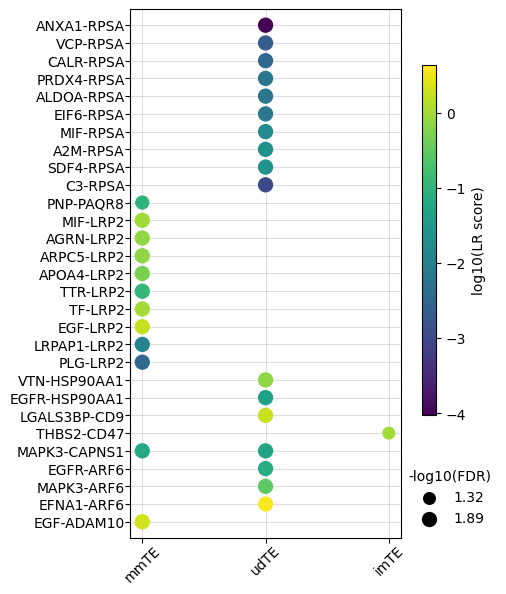

In [10]:
bubbleplot_df = pd.read_csv('./res/ULF_TE_LR.csv',index_col=0)
ExtraCellTalk.BubblePlot(bubbleplot_df, dpi=100, save='./res/ULF_TE_bubbleplot.pdf')

## 6. Plot sankeyplot

In [11]:
sankeyplot_df = pd.read_csv('./res/ULF_TE_LR_liga.csv',index_col=0)
ExtraCellTalk.SankeyPlot(sankeyplot_df, save='./res/ULF_TE_sankeyplot.pdf')